In [1827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as ms
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from mlxtend.preprocessing import minmax_scaling

nba_df = pd.read_csv('raw_data_p.csv')
nba_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,2.5938,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,3.9148,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,3.7550,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,5.5812,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,2.1990,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,10.3740,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,3.8004,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,6.1936,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,2.5348,0.117,0.175,0.074,0.780,0.044,2022-23


In [1828]:
not_usa = nba_df.iloc[:, 7] == 'USA'
nba_df = nba_df.loc[not_usa]
nba_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,2.5938,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,3.9148,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,3.7550,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,5.5812,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,2.1990,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,12838,Joe Wieskamp,TOR,23,198.12,92.986360,Iowa,USA,2021,2,...,1.0,0.4,0.3,1.9630,0.000,0.068,0.115,0.321,0.083,2022-23
12840,12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,3.8004,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,6.1936,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,2.5348,0.117,0.175,0.074,0.780,0.044,2022-23


In [1829]:
nba_df = nba_df.drop(nba_df.columns[:12], axis = 1)
nba_df = nba_df.drop(nba_df.columns[4:6], axis = 1)
nba_df = nba_df.drop(nba_df.columns[-3:], axis = 1)
nba_df

,pts,reb,ast,net_rating,usg_pct
0,3.9,1.5,2.4,2.5938,0.169
1,3.8,1.3,0.3,3.9148,0.174
2,8.3,6.4,1.9,3.7550,0.175
3,10.2,2.8,1.7,5.5812,0.206
4,2.8,1.7,0.3,2.1990,0.195
...,...,...,...,...,...
12838,1.0,0.4,0.3,1.9630,0.115
12840,2.4,0.9,0.6,3.8004,0.102
12841,13.1,6.5,1.2,6.1936,0.168
12842,3.4,4.7,0.5,2.5348,0.074


In [1830]:
nba_df.head(0)

,pts,reb,ast,net_rating,usg_pct


In [1831]:
missing_values = nba_df.isnull().sum()
missing_values

pts           0
reb           0
ast           0
net_rating    0
usg_pct       0
dtype: int64

In [1832]:
print(max(nba_df['pts']))
print(min(nba_df['pts']))
print(max(nba_df['ast']))
print(min(nba_df['ast']))
print(max(nba_df['reb']))
print(min(nba_df['reb']))
print(max(nba_df['usg_pct']))
print(min(nba_df['usg_pct']))
print(max(nba_df['net_rating']))
print(min(nba_df['net_rating']))

36.1
0.0
11.7
0.0
16.3
0.0
1.0
0.0
12.2826
0.2384


In [1833]:
nba_df = nba_df.iloc[:, [0, 1, 2, 4, 3]]
nba_df.describe()

,pts,reb,ast,usg_pct,net_rating
count,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000
mean,8.200392,3.440575,1.847719,0.184798,4.340032
std,6.046752,2.392808,1.813861,0.053896,1.995526
min,0.000000,0.000000,0.000000,0.000000,0.238400
25%,3.600000,1.700000,0.600000,0.149000,2.879400
50%,6.700000,2.900000,1.200000,0.181000,4.045200
75%,11.500000,4.600000,2.500000,0.218000,5.558200
max,36.100000,16.300000,11.700000,1.000000,12.282600


In [1834]:
nba_df_outlier = nba_df[['pts', 'reb', 'ast', 'usg_pct', 'net_rating']] #Lo deje porque tuve un pedo hace rato, pero borrar los nombres no debería de ser un problema.
nba_df_outlier = nba_df_outlier.reset_index()
nba_df_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [1835]:
q1_p, q2_p, q3_p = nba_df_outlier['pts'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_p, '\nQ2: ', q2_p, '\nQ3: ', q3_p)
iqr_p = q3_p - q1_p
print('Interquartil range: ',iqr_p)
upper_limit_p = q3_p + 1.5 * iqr_p
lower_limit_p = q1_p - 1.5 * iqr_p
print('upper limit: ', upper_limit_p, '\nlower_limit: ', lower_limit_p)

Q1:  3.6 
Q2:  6.7 
Q3:  11.5
Interquartil range:  7.9
upper limit:  23.35 
lower_limit:  -8.250000000000002


In [1836]:
nba_df_outlier.query('(pts < @lower_limit_p) or (pts > @upper_limit_p)')

,index,pts,reb,ast,usg_pct,net_rating
7,7,26.8,4.0,2.0,0.272,9.4144
204,206,26.2,12.5,3.1,0.314,9.8228
311,318,24.2,4.6,6.3,0.271,7.8742
359,367,27.4,9.9,4.5,0.325,10.2250
376,384,29.6,5.9,4.3,0.331,8.4262
...,...,...,...,...,...,...
10629,12733,28.9,8.3,6.8,0.322,9.8644
10664,12774,24.0,3.5,6.2,0.266,6.9932
10670,12781,26.2,5.9,8.1,0.338,10.7076
10703,12822,26.6,6.9,3.5,0.307,7.6614


<Axes: xlabel='pts'>

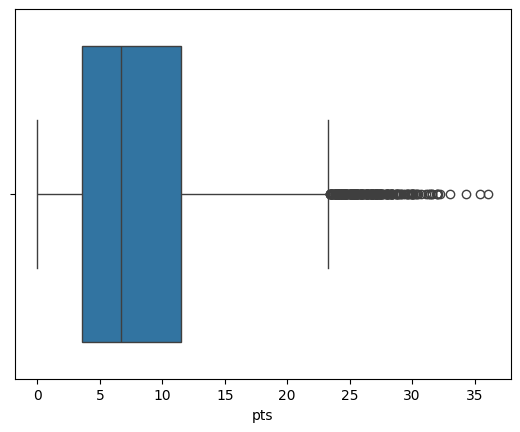

In [1837]:
sns.boxplot(x='pts', data=nba_df_outlier)

In [1838]:
q1_r, q2_r, q3_r = nba_df_outlier['reb'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_r, '\nQ2: ', q2_r, '\nQ3: ', q3_r)
iqr_r = q3_r - q1_r
print('Interquartil range: ', iqr_r)
upper_limit_r = q3_r + 1.5 * iqr_r
lower_limit_r = q1_r - 1.5 * iqr_r
print('upper limit: ', upper_limit_r, '\nlower_limit: ', lower_limit_r)

Q1:  1.7 
Q2:  2.9 
Q3:  4.6
Interquartil range:  2.8999999999999995
upper limit:  8.95 
lower_limit:  -2.6499999999999995


In [1839]:
nba_df_outlier.query('(reb < @lower_limit_r) or (reb > @upper_limit_r)')

,index,pts,reb,ast,usg_pct,net_rating
9,9,21.4,9.0,7.3,0.283,9.1966
39,40,7.1,11.1,0.9,0.114,4.6428
48,49,12.6,9.0,2.4,0.161,5.4322
91,92,13.4,13.5,1.2,0.209,8.6618
103,104,20.1,10.3,4.6,0.244,8.0488
...,...,...,...,...,...,...
10512,12577,14.1,9.6,1.5,0.211,7.8822
10517,12585,25.9,12.5,2.6,0.277,8.4554
10578,12669,7.0,9.3,2.5,0.104,5.3808
10588,12682,25.1,10.0,4.1,0.288,8.6976


<Axes: xlabel='reb'>

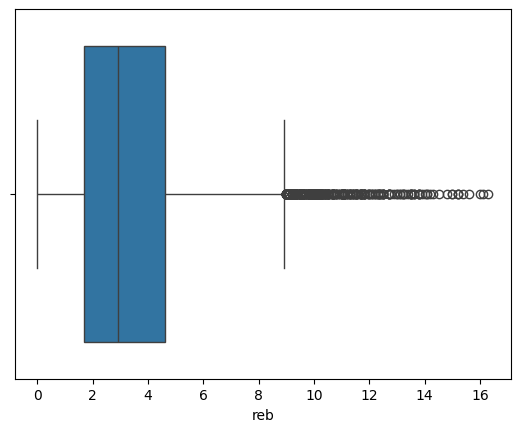

In [1840]:
sns.boxplot(x='reb', data=nba_df_outlier)

In [1841]:
q1_a, q2_a, q3_a = nba_df_outlier['ast'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_a, '\nQ2: ', q2_a, '\nQ3: ', q3_a)
iqr_a = q3_a - q1_a
print('Interquartil range: ',iqr_a)
upper_limit_a = q3_a + 1.5 * iqr_a
lower_limit_a = q1_a - 1.5 * iqr_a
print('upper limit: ', upper_limit_a, '\nlower_limit: ', lower_limit_a)

Q1:  0.6 
Q2:  1.2 
Q3:  2.5
Interquartil range:  1.9
upper limit:  5.35 
lower_limit:  -2.2499999999999996


In [1842]:
nba_df_outlier.query('(ast < @lower_limit_a) or (ast > @upper_limit_a)')

,index,pts,reb,ast,usg_pct,net_rating
9,9,21.4,9.0,7.3,0.283,9.1966
12,12,9.5,2.8,6.3,0.177,6.7554
21,22,21.8,4.6,7.1,0.264,8.1528
65,66,14.4,2.8,10.5,0.186,8.5772
89,90,10.9,4.5,9.0,0.170,7.9140
...,...,...,...,...,...,...
10642,12751,19.3,5.1,7.4,0.244,8.8088
10650,12760,21.0,6.1,10.7,0.247,7.8094
10664,12774,24.0,3.5,6.2,0.266,6.9932
10670,12781,26.2,5.9,8.1,0.338,10.7076


<Axes: xlabel='ast'>

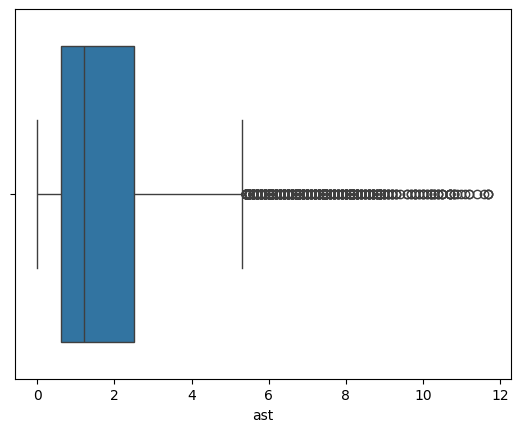

In [1843]:
sns.boxplot(x='ast', data=nba_df_outlier)

In [1844]:
q1_u, q2_u, q3_u = nba_df_outlier['usg_pct'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_u, '\nQ2: ', q2_u, '\nQ3: ', q3_u)
iqr_u = q3_u - q1_u
print('Interquartil range: ',iqr_u)
upper_limit_u = q3_u + 1.5 * iqr_u
lower_limit_u = q1_u - 1.5 *iqr_u
print('upper limit: ', upper_limit_u, '\nlower_limit: ', lower_limit_u)

Q1:  0.149 
Q2:  0.181 
Q3:  0.218
Interquartil range:  0.069
upper limit:  0.3215 
lower_limit:  0.045499999999999985


In [1845]:
nba_df_outlier.query('(usg_pct < @lower_limit_u) or (usg_pct > @upper_limit_u)')

,index,pts,reb,ast,usg_pct,net_rating
126,127,0.0,0.0,0.0,0.000,0.8000
138,139,0.3,1.1,0.3,0.025,2.1450
177,179,17.7,8.5,1.3,0.334,5.7668
359,367,27.4,9.9,4.5,0.325,10.2250
370,378,1.5,1.5,1.0,0.341,1.0682
...,...,...,...,...,...,...
10431,12469,0.0,0.0,0.0,0.000,0.8000
10447,12488,2.0,1.0,0.0,0.385,3.6770
10503,12564,32.2,4.8,7.3,0.331,10.9262
10629,12733,28.9,8.3,6.8,0.322,9.8644


<Axes: xlabel='usg_pct'>

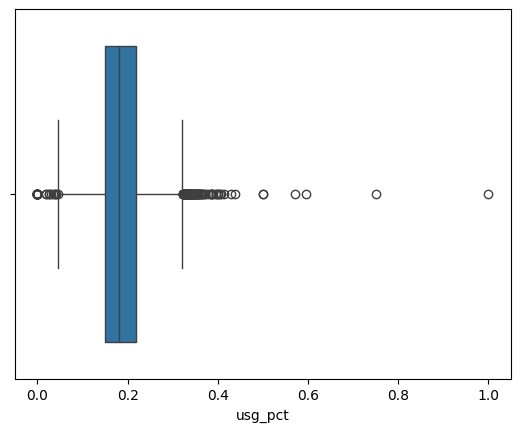

In [1846]:
sns.boxplot(x='usg_pct', data=nba_df_outlier)

In [1847]:
q1_n, q2_n, q3_n = nba_df_outlier['net_rating'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_n, '\nQ2: ', q2_n, '\nQ3: ', q3_n)
iqr_n = q3_n - q1_n
print('Interquartil range: ', iqr_n)
upper_limit_n = q3_n + 1.5 * iqr_n
lower_limit_n = q1_n - 1.5 * iqr_n
print('upper limit: ', upper_limit_n, '\nlower_limit: ', lower_limit_n)

Q1:  2.8794 
Q2:  4.0452 
Q3:  5.5582
Interquartil range:  2.6788000000000003
upper limit:  9.5764 
lower_limit:  -1.1388000000000003


In [1848]:
nba_df_outlier.query('(net_rating < @lower_limit_n) or (net_rating > @upper_limit_n)')

,index,pts,reb,ast,usg_pct,net_rating
137,138,19.2,13.5,4.7,0.230,10.5260
204,206,26.2,12.5,3.1,0.314,9.8228
359,367,27.4,9.9,4.5,0.325,10.2250
419,428,23.5,4.1,7.5,0.284,10.0768
945,972,21.7,4.9,8.7,0.269,9.7138
...,...,...,...,...,...,...
10625,12728,23.3,6.4,8.4,0.289,10.0778
10629,12733,28.9,8.3,6.8,0.322,9.8644
10670,12781,26.2,5.9,8.1,0.338,10.7076
10706,12825,30.1,8.8,4.6,0.319,10.7638


<Axes: xlabel='net_rating'>

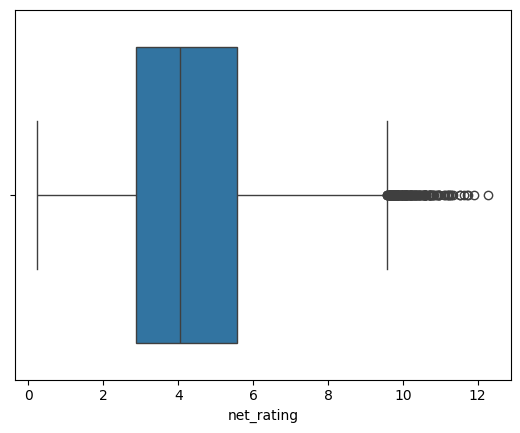

In [1849]:
sns.boxplot(x='net_rating', data=nba_df_outlier)

**OUTLIERS ELIMINATION**

In [1850]:
nba_no_outlier = nba_df_outlier[(nba_df_outlier['pts'] >= lower_limit_p) & (nba_df_outlier['pts'] <= upper_limit_p)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [1851]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['ast'] >= lower_limit_a) & (nba_no_outlier['ast'] <= upper_limit_a)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [1852]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['reb'] >= lower_limit_r) & (nba_no_outlier['reb'] <= upper_limit_r)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [1853]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['usg_pct'] >= lower_limit_u) & (nba_no_outlier['usg_pct'] <= upper_limit_u)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [1854]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['net_rating'] >= lower_limit_n) & (nba_no_outlier['net_rating'] <= upper_limit_n)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [1855]:
missing_values = nba_no_outlier.isnull().sum()
missing_values

index         0
pts           0
reb           0
ast           0
usg_pct       0
net_rating    0
dtype: int64

In [1856]:
nba_no_outlier = nba_no_outlier.drop(nba_no_outlier[['index']], axis = 1)
nba_no_outlier

,pts,reb,ast,usg_pct,net_rating
0,3.9,1.5,2.4,0.169,2.5938
1,3.8,1.3,0.3,0.174,3.9148
2,8.3,6.4,1.9,0.175,3.7550
3,10.2,2.8,1.7,0.206,5.5812
4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...
10716,1.0,0.4,0.3,0.115,1.9630
10717,2.4,0.9,0.6,0.102,3.8004
10718,13.1,6.5,1.2,0.168,6.1936
10719,3.4,4.7,0.5,0.074,2.5348


In [1857]:
nba_no_outlier = nba_no_outlier.reset_index(drop=True)
nba_no_outlier

,pts,reb,ast,usg_pct,net_rating
0,3.9,1.5,2.4,0.169,2.5938
1,3.8,1.3,0.3,0.174,3.9148
2,8.3,6.4,1.9,0.175,3.7550
3,10.2,2.8,1.7,0.206,5.5812
4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...
9486,1.0,0.4,0.3,0.115,1.9630
9487,2.4,0.9,0.6,0.102,3.8004
9488,13.1,6.5,1.2,0.168,6.1936
9489,3.4,4.7,0.5,0.074,2.5348


In [1858]:
new_missing_values = nba_no_outlier.isna().sum()
new_missing_values

pts           0
reb           0
ast           0
usg_pct       0
net_rating    0
dtype: int64

In [1859]:
print(max(nba_no_outlier['pts']))
print(min(nba_no_outlier['pts']))
print(max(nba_no_outlier['ast']))
print(min(nba_no_outlier['ast']))
print(max(nba_no_outlier['reb']))
print(min(nba_no_outlier['reb']))
print(max(nba_no_outlier['usg_pct']))
print(min(nba_no_outlier['usg_pct']))
print(max(nba_no_outlier['net_rating']))
print(min(nba_no_outlier['net_rating']))

23.3
0.0
5.3
0.0
8.9
0.0
0.321
0.046
9.533
0.2384


**NORMALIZATION and SCALING**

In [1860]:
nba_df_dependent = nba_no_outlier[['net_rating']]

In [1861]:
min_max_scaler = MinMaxScaler()
Znormalized_nba_minmax = min_max_scaler.fit_transform(nba_no_outlier[['pts', 'reb', 'ast','usg_pct']])
print(Znormalized_nba_minmax)

[[0.16738197 0.16853933 0.45283019 0.44727273]
 [0.16309013 0.14606742 0.05660377 0.46545455]
 [0.35622318 0.71910112 0.35849057 0.46909091]
 ...
 [0.56223176 0.73033708 0.22641509 0.44363636]
 [0.14592275 0.52808989 0.09433962 0.10181818]
 [0.27467811 0.40449438 0.16981132 0.44727273]]


In [1862]:
Znormalized_nba_minmax_df = pd.DataFrame(Znormalized_nba_minmax, columns = nba_no_outlier.columns[:4])
Znormalized_nba_minmax_df

,pts,reb,ast,usg_pct
0,0.167382,0.168539,0.452830,0.447273
1,0.163090,0.146067,0.056604,0.465455
2,0.356223,0.719101,0.358491,0.469091
3,0.437768,0.314607,0.320755,0.581818
4,0.120172,0.191011,0.056604,0.541818
...,...,...,...,...
9486,0.042918,0.044944,0.056604,0.250909
9487,0.103004,0.101124,0.113208,0.203636
9488,0.562232,0.730337,0.226415,0.443636
9489,0.145923,0.528090,0.094340,0.101818


In [1863]:
final_nba_df = pd.concat([Znormalized_nba_minmax_df, nba_df_dependent], axis = 1)
final_nba_df

,pts,reb,ast,usg_pct,net_rating
0,0.167382,0.168539,0.452830,0.447273,2.5938
1,0.163090,0.146067,0.056604,0.465455,3.9148
2,0.356223,0.719101,0.358491,0.469091,3.7550
3,0.437768,0.314607,0.320755,0.581818,5.5812
4,0.120172,0.191011,0.056604,0.541818,2.1990
...,...,...,...,...,...
9486,0.042918,0.044944,0.056604,0.250909,1.9630
9487,0.103004,0.101124,0.113208,0.203636,3.8004
9488,0.562232,0.730337,0.226415,0.443636,6.1936
9489,0.145923,0.528090,0.094340,0.101818,2.5348


**TRAINING MODEL**

In [1864]:
part_nba_df = final_nba_df[['pts', 'ast', 'reb', 'usg_pct', 'net_rating']]
msk = np.random.rand(len(final_nba_df)) < 0.8
train = part_nba_df[msk]
LR_Model = linear_model.LinearRegression()
axis_x = np.asanyarray(train[['pts', 'reb', 'ast', 'usg_pct']])
axis_y = np.asanyarray(train[['net_rating']])
LR_Model.fit(axis_x, axis_y)

print('The coefficients are: ', LR_Model.coef_)

The coefficients are:  [[4.62729102 1.77148017 1.08530154 0.13043428]]


**TESTING**

In [1865]:
test = part_nba_df[~msk]
axis_y_ = LR_Model.predict(test[['pts', 'reb', 'ast', 'usg_pct']])
axis_2_x = np.asanyarray(test[['pts', 'reb', 'ast', 'usg_pct']])
axis_2_y = np.asanyarray(test[['net_rating']])
mae = mean_absolute_error(axis_2_y, axis_y_)
mse = mean_squared_error(axis_2_y, axis_y_)
rmse = np.sqrt(mse)
print('The Mean absolute error is: %.7f'%mae)
print('The Mean Squared Error: %.7f'% mse)
print('The Root of Mean Squared Error is: %.7f'%rmse)
print('Sum Squares residual: %.7f' %np.mean((axis_y_ - axis_2_y)**2))
print('Variance score: %.7f' %LR_Model.score(axis_2_x, axis_2_y))
r_squared = LR_Model.score(axis_2_x, axis_2_y)
print('La r cuadrada es: ', r_squared)

The Mean absolute error is: 0.7532540
The Mean Squared Error: 0.7519323
The Root of Mean Squared Error is: 0.8671403
Sum Squares residual: 0.7519323
Variance score: 0.7277385
La r cuadrada es:  0.7277385317693065


c:\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


IndexError: index 1 is out of bounds for axis 0 with size 1

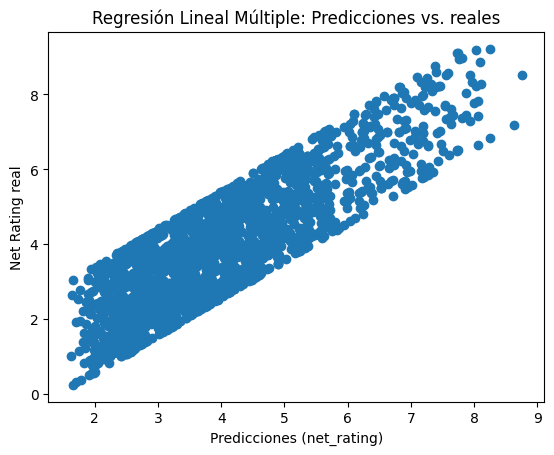

In [1866]:
# Crea una figura y un eje principal
fig, ax = plt.subplots()

# Opcionalmente, puedes personalizar el título y las etiquetas de los ejes
ax.set_title("Regresión Lineal Múltiple: Predicciones vs. reales")
ax.set_xlabel("Predicciones (net_rating)")
ax.set_ylabel("Net Rating real")
ax.scatter(axis_y_, axis_2_y)
# Obtiene los coeficientes y el intercepto del modelo
coefs = LR_Model.coef_
intercept = LR_Model.intercept_

# Calcula la línea de regresión para un rango de valores de las predicciones
predicted_range = np.linspace(min(axis_y_), max(axis_y_))
fitted_line = coefs[0] * predicted_range + coefs[1] * predicted_range**2 + coefs[2] * predicted_range**3 + coefs[3] + intercept

# Grafica la línea de regresión
ax.plot(predicted_range, fitted_line, color='red')
ax.text(0.05, 0.95, f"R-cuadrado: {r_squared:.3f}", transform=ax.transAxes)

# Agrega leyendas
ax.legend(['Puntos reales', 'Línea de regresión'], loc='upper left')
plt.show()

**CLEANING CLASS**

In [ ]:
class Cleaning:

    def __clean_raw_data(self):
        '''
        Private method to make the cleaning of the raw_data_file. First it only selects the 'USA' players and then it selects the columns that match with the selected correlation.

        INPUT
        - Excepts nothing

        OUTPUT
        - Returns a pandas.DataFrame with the cleaned data
        '''
        # Selecting only 'USA' players and selecting only columns that can be described.    
        df = self.raw_file.query("country == 'USA'")
        if self.verbose: print(f"Dataset with only 'USA' players...\n{df.head().to_string()}",end='\n\n')

        df = df[[column for column in self.raw_file.describe().columns]]
        if self.verbose: print(f"Dataset with only useful columns...\n{df.head().to_string()}",end='\n\n')

        # Checking which columns are related to 'net_rating'|
        columns_with_needed_correlation = [row.Index for row in df.corr().itertuples() if row.net_rating >= self.correlation_in_columns]
        if self.verbose: print(f"Correlation matrix...\n{df.corr()}",end='\n\n')

        # Selecting only features that we need from our df
        df = df[columns_with_needed_correlation]

        # Validator to drop 'gp' column
        if 'gp' in df.columns: df.drop(axis=1,labels='gp',inplace=True)

        if self.verbose: print(f"Data cleaned...\n{df.corr()}",end='\n\n')
        return df

    def __drop_outliers(self):
        '''
        Private method to eliminate the outliers of the 'clean_data_df'.

        INPUT
        * Expects nothing.

        OUTPUT
        * Returns a 'pandas.DataFrame' with the outliers dropped from 'clean_data_df'.
        '''
        
        df = self.clean_data_df
        for column in df.columns:
            q1, q2, q3 = df[column].quantile([0.25,0.50,0.75])
            interquartile_range = q3 - q1
            upper_limit = q3 + 1.5 * interquartile_range
            lower_limit = q3 - 1.5 * interquartile_range


            df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
        return df

    def __scaler_method(self):
        '''
        Private method to standarize data by scaling method

        INPUT
        - Expects nothing

        OUTPUT
        - Returns a dataframe with the standarized data
        '''
        df = self.clean_data_df
        dependent_variable_list = df[self.dependent_variable_name]
        dependent_variable_list.reset_index(drop=True, inplace=True)
        df = df.drop(labels=[self.dependent_variable_name],axis=1)
        standar_scaler = StandardScaler()
        normalized = standar_scaler.fit_transform(df)
        normalized = pd.DataFrame(data=normalized, columns=df.columns)
        normalized.reset_index(drop=True, inplace=True)

        df = pd.concat((dependent_variable_list,normalized),axis=1)
        return df
    
    def __minmax_method(self):
        '''
        Private method to standarize data by Min-Max method

        INPUT
        - Expects nothing

        OUTPUT
        - Returns a dataframe with the standarized data
        '''
        df = self.clean_data_df
        dependent_variable_list = df[self.dependent_variable_name]
        dependent_variable_list.reset_index(drop=True, inplace=True)
        df = df.drop(labels=[self.dependent_variable_name],axis=1)
        minmax_scaler = MinMaxScaler()
        normalized = minmax_scaler.fit_transform(df)
        normalized = pd.DataFrame(data=normalized, columns=df.columns)
        normalized.reset_index(drop=True, inplace=True)
        df = pd.concat((dependent_variable_list,normalized),axis=1)
        return df

    def __init__(self, raw_file_path:str, dependent_variable_name:str = 'net_rating', correlation_in_columns:float = 0.49, normalization_method:str = 'Scaler', download_mode:bool = False, cleaned_file_path:str = '', verbose:bool = False):
        '''
        Class created to do the cleaning of a CSV file

        INPUT
        - raw_file_path           [str]   = Expects the path where the raw_data is located.
        - dependent_variable_name [str]   = Expects the name of the dependent variable. default set to 'net_rating'.
        - correlation_in_columns  [float] = Expects a value between 0 and 1 that will be used to select columns that fits in that range. Default set to 0.49.
        - normalization_method    [str]   = Refers to the method that will be used to normalize data. Default set to 'Scaler'.
        - download_mode           [bool]  = If set to 'True', then at the end of the cleaning, a CSV file will be stored in 'cleaned_file_path'. Default set to 'False'.
        - cleaned_file_path       [str]   = Expects the path where the 'cleaned_raw_data.csv' file will be located.
        - verbose                 [bool]  = If set to 'True', it will be printing the process of the data cleaning; recommended for debugging. Default set to 'False'.

        OUTPUT (According to method)
        - __init__(download_mode = True) = Downloads a CSV file with the cleaned data.
        - save_distribution_image() = Downloads a PNG image with the distribution of the cleaned data.
        '''
        # Defining parameters
        self.dependent_variable_name = dependent_variable_name
        self.correlation_in_columns = correlation_in_columns
        self.verbose = verbose

        # Reading our CSV
        self.raw_file = pd.read_csv(raw_file_path,index_col=0)
        if verbose: print(f"{'*'*15} Handling Raw Data {'*'*15}\n{self.raw_file.head().to_string()}",end='\n\n')
        self.clean_data_df = self.__clean_raw_data()

        # Dropping outliers
        self.clean_data_df = self.__drop_outliers()
        if verbose: print(f"{'*'*15} DataSet without Outliers {'*'*15}\n{self.clean_data_df.head().to_string()}",end='\n\n')

        # Estandarizing data
        if normalization_method == 'Min-Max':
            self.clean_data_df = self.__minmax_method()
        else:
            self.clean_data_df = self.__scaler_method()
        if verbose: print(f"\n{'*'*15} Scaled DataSet {'*'*15}\n{self.clean_data_df.head().to_string()}",end='\n\n')

        # # Saving document
        if download_mode: 
            self.clean_data_df.to_csv(f'{cleaned_file_path}cleaned_raw_data.csv')
            if verbose: print('\nFile saved...!\n\n')

    def save_distribution_image(self,download_image_path:str):
        '''
        Public method to get a graph with the histogram of every column and save it.

        INPUT
        * Expects nothing

        OUTPUT
        * Returns nothing, but saves an image with the plot in the 'download_image_path'.
        '''
        x = 1
        fig = plt.figure(figsize=(10, 6))
        for column in self.clean_data_df.columns:
            if column == self.dependent_variable_name: continue
            plt.subplot(2,2,x)
            plt.hist(self.clean_data_df[column])
            plt.title(column)
            x += 1
        fig.tight_layout()
        plt.savefig(download_image_path)

**REGRESSION CLASS**

In [ ]:
class Regression:
    def __init__(self):
        self.part_nba_df = part_nba_df
        self.final_nba_df = final_nba_df
        self.msk = msk
        self.train = train
        self.LR_Model = LR_Model
        self.axis_x = axis_x
        self.axis_y = axis_y
        self.test = test
        self.axis_y_ = axis_y_
        self.axis_2_x = axis_2_x
        self.axis_2_y = axis_2_y
        self.mae = mae
        self.mse = mse
        self.rmse = rmse
        self.r_squared = r_squared
              
    def LinearR_Model(self):
        #Creating a dataframe named 'part_nba_df' that will be used for prediction.
        part_nba_df = final_nba_df[['pts', 'ast', 'reb', 'usg_pct', 'net_rating']]
        
        #[msk] variable makes a mask for the values of a matrix and turns them into True.
        msk = np.random.rand(len(final_nba_df)) < 0.8
        
        #Asigning [msk] to 'part_nba_df', and it will be stored in 'train' for independent variables training.
        train = part_nba_df[msk]
        LR_Model = linear_model.LinearRegression()
        axis_x = np.asanyarray(train[['pts', 'reb', 'ast', 'usg_pct']])
        axis_y = np.asanyarray(train[['net_rating']])
        LR_Model.fit(axis_x, axis_y)
        print('The coefficients are: ', LR_Model.coef_)

        #[~msk] function makes a mask for the values of a matrix and turns them into False.
        #Due to we split the total of values in 80-20, the 20 percent that did not take the msk goes to ~msk and it is stored in 'test' for testing.
        test = part_nba_df[~msk]
        
        #Prediction model
        axis_y_ = LR_Model.predict(test[['pts', 'reb', 'ast', 'usg_pct']])
        
        #Variables for the testing.
        axis_2_x = np.asanyarray(test[['pts', 'reb', 'ast', 'usg_pct']]) #Independent variables.
        axis_2_y = np.asanyarray(test[['net_rating']]) #Dependent variable.
        mae = mean_absolute_error(axis_2_y, axis_y_)
        mse = mean_squared_error(axis_2_y, axis_y_)
        rmse = np.sqrt(mse)
        r_squared = LR_Model.score(axis_2_x, axis_2_y)

        #Printing metrics.
        print('The Mean absolute error is: %.7f' %mae)
        print('The Mean Squared Error: %.7f' %mse)
        print('The Root of Mean Squared Error is: %.7f'%rmse)
        print('Sum Squares residual: %.7f' %np.mean((axis_y_ - axis_2_y)**2))
        print('Variance score: %.7f' %LR_Model.score(axis_2_x, axis_2_y))
        print('The R squared is: ', r_squared)